<a href="https://colab.research.google.com/github/parikshitraghav07/Projects/blob/main/Garch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy yfinance statsmodels matplotlib arch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 8.7 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from arch import arch_model

In [ ]:
# Define the ticker symbol
ticker = 'MARUTI.NS'

# Fetch historical stock data
data = yf.download(ticker, start='2015-01-01', end='2023-06-01')

# Use the adjusted closing prices
data = data[['Adj Close']].rename(columns={'Adj Close': 'Close'})

# Display the first few rows of the dataframe
data.head()

[*********************100%%**********************]  1 of 1 completed


,Close
Date,
2015-01-01,3093.800293
2015-01-02,3111.257080
2015-01-05,3192.937012
2015-01-06,3144.271729
2015-01-07,3183.630371


In [ ]:
# Calculate daily returns
data['Returns'] = data['Close'].pct_change().dropna()

# Drop NA values
data = data.dropna()

# Display the first few rows
data.head()

,Close,Returns
Date,,
2015-01-02,3111.257080,0.005643
2015-01-05,3192.937012,0.026253
2015-01-06,3144.271729,-0.015242
2015-01-07,3183.630371,0.012518
2015-01-08,3218.589844,0.010981


In [ ]:
# Define the GARCH model
garch_model = arch_model(data['Returns'], vol='Garch', p=1, q=1)

# Fit the model
garch_fit = garch_model.fit(disp='off')

# Print the summary of the model
print(garch_fit.summary())

                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                5590.85
Distribution:                  Normal   AIC:                          -11173.7
Method:            Maximum Likelihood   BIC:                          -11151.1
                                        No. Observations:                 2076
Date:                Sun, Jun 02 2024   Df Residuals:                     2075
Time:                        16:31:15   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.0742e-03  2.790e-05     38.501      0.000 [1.

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0003325. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


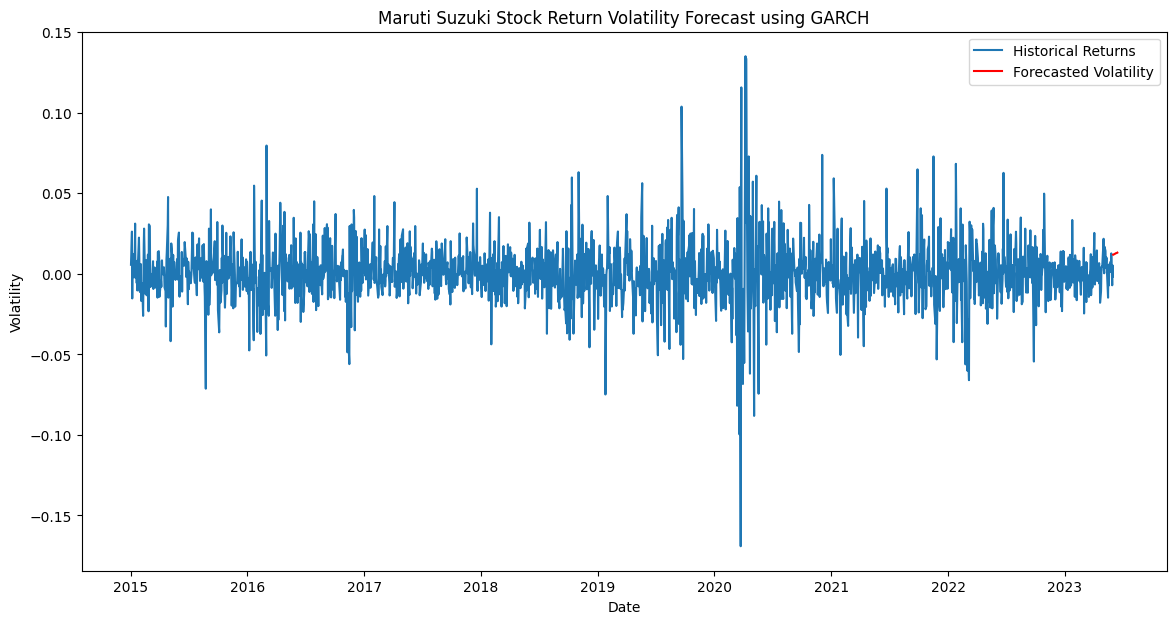

In [ ]:
# Forecast the next 10 days
forecast_horizon = 10
garch_forecast = garch_fit.forecast(horizon=forecast_horizon)

# Extract the forecasts
forecast_variance = garch_forecast.variance.values[-1, :]
forecast_std = np.sqrt(forecast_variance)

# Create a DataFrame to hold the forecasts
forecast_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=forecast_horizon, freq='B')
forecast_df = pd.DataFrame({'Forecasted Volatility': forecast_std}, index=forecast_dates)

# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Returns'], label='Historical Returns')
plt.plot(forecast_df.index, forecast_df['Forecasted Volatility'], label='Forecasted Volatility', color='red')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Maruti Suzuki Stock Return Volatility Forecast using GARCH')
plt.legend()
plt.show()

In [ ]:
forecast_df

,Forecasted Volatility
2023-06-01,0.011929
2023-06-02,0.012087
2023-06-05,0.012240
2023-06-06,0.012389
2023-06-07,0.012533
2023-06-08,0.012672
2023-06-09,0.012807
2023-06-12,0.012938
2023-06-13,0.013065
2023-06-14,0.013188
